# Example 7

In [1]:
import gemgis as gg

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import geopandas as gpd
import rasterio 

In [3]:
topo = gpd.read_file('topo7.shp')
topo.head()

,id,Z,geometry
0,None,1400,"LINESTRING (3.284 251.204, 70.568 216.700, 129..."
1,None,1300,"LINESTRING (1.559 681.649, 61.079 639.381, 127..."
2,None,1200,"LINESTRING (4.146 1199.219, 94.721 1109.507, 1..."
3,None,1300,"LINESTRING (4.578 2374.964, 84.370 2414.213, 1..."
4,None,1200,"LINESTRING (4.146 2108.847, 71.430 2114.885, 1..."


In [4]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=10)


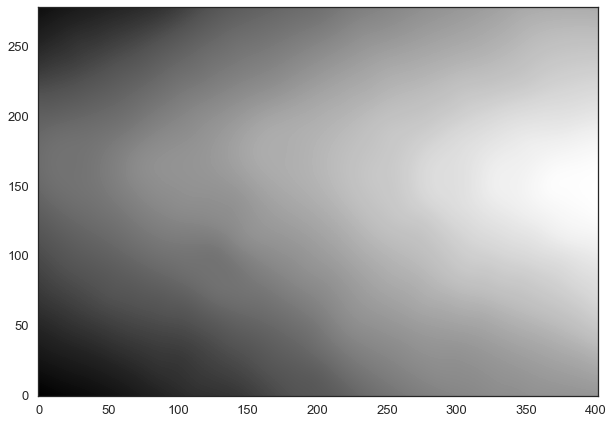

In [5]:
import matplotlib.pyplot as plt
plt.imshow(topo_raster, origin='lower')

In [6]:
topo_raster = rasterio.open('raster7.tif')

In [7]:
interfaces = gpd.read_file('interfaces7.shp')
interfaces.head()

,id,formation,geometry
0,None,H,"LINESTRING (2701.546 2406.881, 2753.302 2392.2..."
1,None,G,"LINESTRING (3160.457 2785.569, 3226.878 2673.4..."
2,None,G,"LINESTRING (2905.123 4.496, 2965.506 125.262, ..."
3,None,F,"LINESTRING (3239.818 2.771, 3292.437 100.246, ..."
4,None,E,"LINESTRING (3896.268 2.771, 3938.536 86.445, 3..."


In [8]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=topo_raster)
interfaces_coords = interfaces_coords.sort_values(by='formation', ascending=False)
interfaces_coords = interfaces_coords[interfaces_coords['formation'].isin(['D', 'E', 'F', 'C', 'B', 'H', 'G'])] 
interfaces_coords.head()

,formation,geometry,X,Y,Z
0,H,POINT (2701.546 2406.881),2701.55,2406.88,911.61
17,H,POINT (2731.737 712.704),2731.74,712.70,904.72
1,H,POINT (2753.302 2392.216),2753.30,2392.22,904.77
31,H,POINT (2683.431 2403.430),2683.43,2403.43,913.30
29,H,POINT (2663.590 2327.520),2663.59,2327.52,895.20


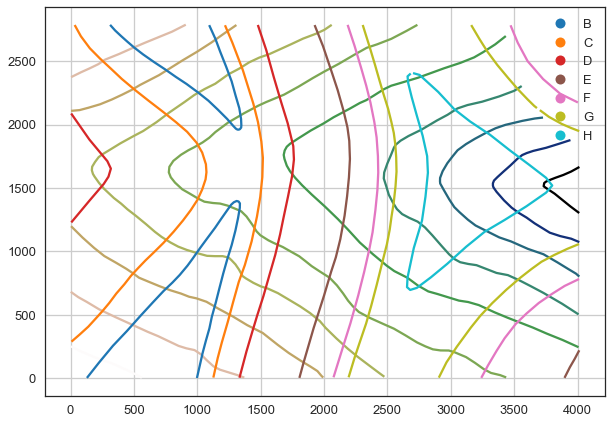

In [9]:
fig, ax = plt.subplots(1)

topo.plot(ax=ax, column='Z', cmap='gist_earth', aspect='equal')
interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')

plt.grid()

In [10]:
strikes = gpd.read_file('strikes7.shp')
strikes.head()

,id,formation,Z,geometry
0,1,H,500,"LINESTRING (3775.502 1556.773, 3777.227 1482.157)"
1,2,H,600,"LINESTRING (3536.557 1741.804, 3533.970 1312.221)"
2,3,H,700,"LINESTRING (3281.223 1939.343, 3278.635 1159.538)"
3,4,H,800,"LINESTRING (3034.515 2115.317, 3025.026 947.335)"
4,2,H1,900,"LINESTRING (2660.140 2341.322, 2657.552 791.202)"


In [11]:
orientations_b = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='B'].sort_values(by='Z', ascending=True).reset_index())
orientations_b

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,48.08,90.40,1050.00,POINT (1289.120 1684.656),1.00,B,1289.12,1684.66
1,44.77,90.25,1150.00,POINT (1191.860 1645.299),1.00,B,1191.86,1645.30
2,45.45,90.15,1250.00,POINT (1090.395 1549.117),1.00,B,1090.40,1549.12


In [12]:
orientations_b1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='B1'].sort_values(by='Z', ascending=True).reset_index())
orientations_b1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,21.67,90.24,1050.00,POINT (1131.154 1653.170),1.00,B1,1131.15,1653.17
1,22.38,90.19,1150.00,POINT (879.917 1593.218),1.00,B1,879.92,1593.22
2,21.07,90.17,1250.00,POINT (625.877 1541.677),1.00,B1,625.88,1541.68
3,22.22,90.21,1350.00,POINT (372.268 1490.136),1.00,B1,372.27,1490.14


In [13]:
orientations_c = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='C'].sort_values(by='Z', ascending=True).reset_index())
orientations_c

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,44.89,90.05,1050.00,POINT (1400.182 1647.671),1.00,C,1400.18,1647.67
1,46.27,89.68,1150.00,POINT (1298.016 1630.742),1.00,C,1298.02,1630.74
2,45.82,89.73,1250.00,POINT (1194.502 1529.169),1.00,C,1194.50,1529.17


In [14]:
orientations_c1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='C1'].sort_values(by='Z', ascending=True).reset_index())
orientations_c1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,22.00,90.03,1050.00,POINT (880.887 1605.834),1.00,C1,880.89,1605.83
1,21.02,90.00,1150.00,POINT (625.984 1571.006),1.00,C1,625.98,1571.01
2,22.47,90.04,1250.00,POINT (373.777 1535.531),1.00,C1,373.78,1535.53


In [15]:
orientations_d = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='D'].sort_values(by='Z', ascending=True).reset_index())
orientations_d

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,43.21,90.59,950.00,POINT (1694.388 1687.459),1.00,D,1694.39,1687.46
1,47.09,90.51,1050.00,POINT (1593.246 1635.810),1.00,D,1593.25,1635.81
2,46.90,90.42,1150.00,POINT (1498.520 1611.873),1.00,D,1498.52,1611.87
3,43.42,90.28,1250.00,POINT (1395.761 1496.605),1.00,D,1395.76,1496.61


In [16]:
orientations_d1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='D1'].sort_values(by='Z', ascending=True).reset_index())
orientations_d1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,22.43,90.07,1150.00,POINT (124.913 1649.935),1.00,D1,124.91,1649.94


In [17]:
orientations_e = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='E'].sort_values(by='Z', ascending=True).reset_index())
orientations_e

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,43.76,90.34,950.00,POINT (2099.332 1639.422),1.00,E,2099.33,1639.42
1,45.01,90.27,1050.00,POINT (1996.034 1608.314),1.00,E,1996.03,1608.31
2,43.87,90.13,1150.00,POINT (1891.549 1524.425),1.00,E,1891.55,1524.42


In [18]:
orientations_f = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='F'].sort_values(by='Z', ascending=True).reset_index())
orientations_f

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,22.87,90.06,750.00,POINT (3892.926 1329.042),1.00,F,3892.93,1329.04
1,22.62,90.02,850.00,POINT (3652.148 1342.844),1.00,F,3652.15,1342.84
2,21.94,90.16,950.00,POINT (3404.146 1346.510),1.00,F,3404.15,1346.51


In [19]:
orientations_f1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='F1'].sort_values(by='Z', ascending=True).reset_index())
orientations_f1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,45.08,90.35,950.00,POINT (2303.988 1581.088),1.00,F1,2303.99,1581.09
1,47.80,90.16,1050.00,POINT (2203.061 1538.981),1.00,F1,2203.06,1538.98


In [20]:
orientations_g = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='G'].sort_values(by='Z', ascending=True).reset_index())
orientations_g

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,23.14,89.99,650.00,POINT (3893.249 1475.040),1.00,G,3893.25,1475.04
1,22.18,90.01,750.00,POINT (3652.148 1500.919),1.00,G,3652.15,1500.92
2,22.32,89.97,850.00,POINT (3405.979 1548.255),1.00,G,3405.98,1548.25
3,22.15,90.18,950.00,POINT (3156.252 1530.894),1.00,G,3156.25,1530.89


In [21]:
orientations_g1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='G1'].sort_values(by='Z', ascending=True).reset_index())
orientations_g1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,47.83,90.14,850.00,POINT (2507.888 1600.335),1.00,G1,2507.89,1600.34
1,44.48,90.31,950.00,POINT (2406.315 1571.006),1.00,G1,2406.32,1571.01
2,46.29,90.39,1050.00,POINT (2303.880 1516.014),1.00,G1,2303.88,1516.01


In [22]:
orientations_h = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='H'].sort_values(by='Z', ascending=True).reset_index())
orientations_h

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,22.62,90.30,550.00,POINT (3655.814 1523.239),1.00,H,3655.81,1523.24
1,21.43,90.23,650.00,POINT (3407.596 1538.227),1.00,H,3407.60,1538.23
2,21.95,90.38,750.00,POINT (3154.850 1540.383),1.00,H,3154.85,1540.38


In [23]:
orientations_h1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='H1'].sort_values(by='Z', ascending=True).reset_index())
orientations_h1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,42.80,90.12,850.00,POINT (2713.191 1576.829),1.00,H1,2713.19,1576.83


In [24]:
import pandas as pd
orientations = pd.concat([orientations_b, orientations_b1, orientations_c, orientations_c1, orientations_d, orientations_d1, orientations_e, orientations_f, orientations_f1, orientations_g, orientations_g1, orientations_h, orientations_h1]).reset_index()
orientations['formation'] = ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D',
 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'H', 'H', 'H', 'H']
orientations = orientations[orientations['formation'].isin(['D', 'E', 'F', 'C', 'B', 'H', 'G'])]
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,48.08,90.40,1050.00,POINT (1289.120 1684.656),1.00,B,1289.12,1684.66
1,1,44.77,90.25,1150.00,POINT (1191.860 1645.299),1.00,B,1191.86,1645.30
2,2,45.45,90.15,1250.00,POINT (1090.395 1549.117),1.00,B,1090.40,1549.12
3,0,21.67,90.24,1050.00,POINT (1131.154 1653.170),1.00,B,1131.15,1653.17
4,1,22.38,90.19,1150.00,POINT (879.917 1593.218),1.00,B,879.92,1593.22
5,2,21.07,90.17,1250.00,POINT (625.877 1541.677),1.00,B,625.88,1541.68
6,3,22.22,90.21,1350.00,POINT (372.268 1490.136),1.00,B,372.27,1490.14
7,0,44.89,90.05,1050.00,POINT (1400.182 1647.671),1.00,C,1400.18,1647.67
8,1,46.27,89.68,1150.00,POINT (1298.016 1630.742),1.00,C,1298.02,1630.74
9,2,45.82,89.73,1250.00,POINT (1194.502 1529.169),1.00,C,1194.50,1529.17


In [25]:
import numpy as np 
orientations['dip'] = np.abs(orientations['dip'].values)
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,48.08,90.40,1050.00,POINT (1289.120 1684.656),1.00,B,1289.12,1684.66
1,1,44.77,90.25,1150.00,POINT (1191.860 1645.299),1.00,B,1191.86,1645.30
2,2,45.45,90.15,1250.00,POINT (1090.395 1549.117),1.00,B,1090.40,1549.12
3,0,21.67,90.24,1050.00,POINT (1131.154 1653.170),1.00,B,1131.15,1653.17
4,1,22.38,90.19,1150.00,POINT (879.917 1593.218),1.00,B,879.92,1593.22
5,2,21.07,90.17,1250.00,POINT (625.877 1541.677),1.00,B,625.88,1541.68
6,3,22.22,90.21,1350.00,POINT (372.268 1490.136),1.00,B,372.27,1490.14
7,0,44.89,90.05,1050.00,POINT (1400.182 1647.671),1.00,C,1400.18,1647.67
8,1,46.27,89.68,1150.00,POINT (1298.016 1630.742),1.00,C,1298.02,1630.74
9,2,45.82,89.73,1250.00,POINT (1194.502 1529.169),1.00,C,1194.50,1529.17


In [26]:
import gempy as gp

In [27]:
geo_model = gp.create_model('Model7')
geo_model

Model7  2021-03-24 20:16

In [28]:
gp.init_data(geo_model, [0,4016,0,2790,-250,1500], [50,50,75],
             surface_points_df = interfaces_coords[interfaces_coords['Z']!=0],
             orientations_df = orientations,
             default_values=True)

Active grids: ['regular']


Model7  2021-03-24 20:16

In [29]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,H,Default series,1,#015482,1
1,G,Default series,2,#9f0052,2
2,F,Default series,3,#ffbe00,3
3,E,Default series,4,#728f02,4
4,D,Default series,5,#443988,5
5,C,Default series,6,#ff3f20,6
6,B,Default series,7,#5DA629,7


In [30]:
gp.map_stack_to_surfaces(geo_model,
                         {
                            
                          'Strata1': ('H','G','F','E','D','C','B'),   
#                       'Strata1': ('H'),
#                       'Strata2': ('G'),
#                       'Strata3': ('F'),
#                       'Strata4': ('E'),
#                          'Strata5': ('D'),
#                          'Strata6': ('C'),
#                          'Strata7': ('B'),
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('A')

,surface,series,order_surfaces,color,id
0,H,Strata1,1,#015482,1
1,G,Strata1,2,#9f0052,2
2,F,Strata1,3,#ffbe00,3
3,E,Strata1,4,#728f02,4
4,D,Strata1,5,#443988,5
5,C,Strata1,6,#ff3f20,6
6,B,Strata1,7,#5DA629,7
7,A,Strata1,8,#4878d0,8


In [31]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
0,H,Strata1,1,#015482,1,32,4
1,G,Strata1,2,#9f0052,2,51,7
2,F,Strata1,3,#ffbe00,3,34,5
3,E,Strata1,4,#728f02,4,23,3
4,D,Strata1,5,#443988,5,26,5
5,C,Strata1,6,#ff3f20,6,52,6
6,B,Strata1,7,#5DA629,7,64,7
7,A,Strata1,8,#4878d0,8,0,0


In [32]:
geo_model.set_topography(
    source='gdal', filepath='raster7.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  40.16      ,   27.9       , -238.33333333],
       [  40.16      ,   27.9       , -215.        ],
       [  40.16      ,   27.9       , -191.66666667],
       ...,
       [4011.00497512, 2765.        ,  898.98010254],
       [4011.00497512, 2775.        ,  902.10076904],
       [4011.00497512, 2785.        ,  905.22875977]])

In [33]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                    values
range             5193.73
$C_o$           642258.48
drift equations       [3]


In [34]:
sol = gp.compute_model(geo_model, compute_mesh=True)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\core\solution.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.geological_map = np.array([values[0][:, l0: l1], values[4][:, l0: l1].astype(float)])


In [36]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=False, show_lith=True)